In [5]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [302]:
def eachStep(S, G, action_rewards, wind, moves, epsilon, alpha, gama):
    
    #m is the move choice, epsilon greedy
    M=np.arange(8)
    r = random.random()
    if(r<epsilon):
#         print("random")
        m=random.choice(M)
    else:
#         print("max")
        max_action = max(action_rewards[S[0]][S[1]])
        positions = [i for i, j in enumerate(action_rewards[S[0]][S[1]]) if j == max_action]
#         print("positions:", positions)
        m=random.choice(positions)

#     print('choice m:', m)
    move_choice = moves[m]
#     print("move_choice:", move_choice)
    
    if(wind[S[1]]==0):
        S_next = S+move_choice
    
    blows = [0,1,2]
    if(wind[S[1]]==1):
        blow = random.choice(blows)
        if(blow==0):S_next = S+move_choice+[2,0]
        if(blow==1):S_next = S+move_choice+[1,0]
        if(blow==2):S_next = S+move_choice+[0,0]
        
    if(wind[S[1]]==2):
        blow = random.choice(blows)
        if(blow==0):S_next = S+move_choice+[3,0]
        if(blow==1):S_next = S+move_choice+[2,0]
        if(blow==2):S_next = S+move_choice+[1,0]
            
    if(S_next[0]>6):S_next[0]=6
    if(S_next[0]<0):S_next[0]=0
    if(S_next[1]>11):S_next[1]=11
    if(S_next[1]<0):S_next[1]=0
    
    if (S_next==G).all():
        R = 10
    else:
        R = -1
        
    action_rewards[S[0], S[1], m] = (1-alpha)*action_rewards[S[0], S[1], m] + alpha*(R+gama*max(action_rewards[S_next[0], S_next[1]]))
    
    return S_next, action_rewards

In [303]:
def eachEpisode(S, G, action_rewards, wind, moves, epsilon, alpha, gama):
    
    reward = 0
    steps = 0
    while (S != G).any():
        S, action_rewards = eachStep(S, G, action_rewards, wind, moves, epsilon, alpha, gama)
        reward = reward-1
        steps += 1
    reward = reward + 10
    return action_rewards, reward, steps

In [ ]:
#***********************************************************************************************************

In [336]:
action_rewards = np.zeros((7,12,8))
wind = [0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0]
moves =np.array(  [ [0, 1], [1,1], [1,0], [1,-1], [0,-1], [-1, -1], [-1,0], [-1, 1] ] )
epsilon = 0.05
alpha = 0.1
gama = 0.9
G=np.array([3, 9])

reward_data = [] # store reward of each episode
steps_data = [] # store steps of each episode

Times=0
while Times<5000:
    S=np.array([3, 0])
    action_rewards, reward, steps = eachEpisode(S, G, action_rewards, wind, moves, epsilon, alpha, gama)
    reward_data.append(reward)
    steps_data.append(steps)
    Times += 1

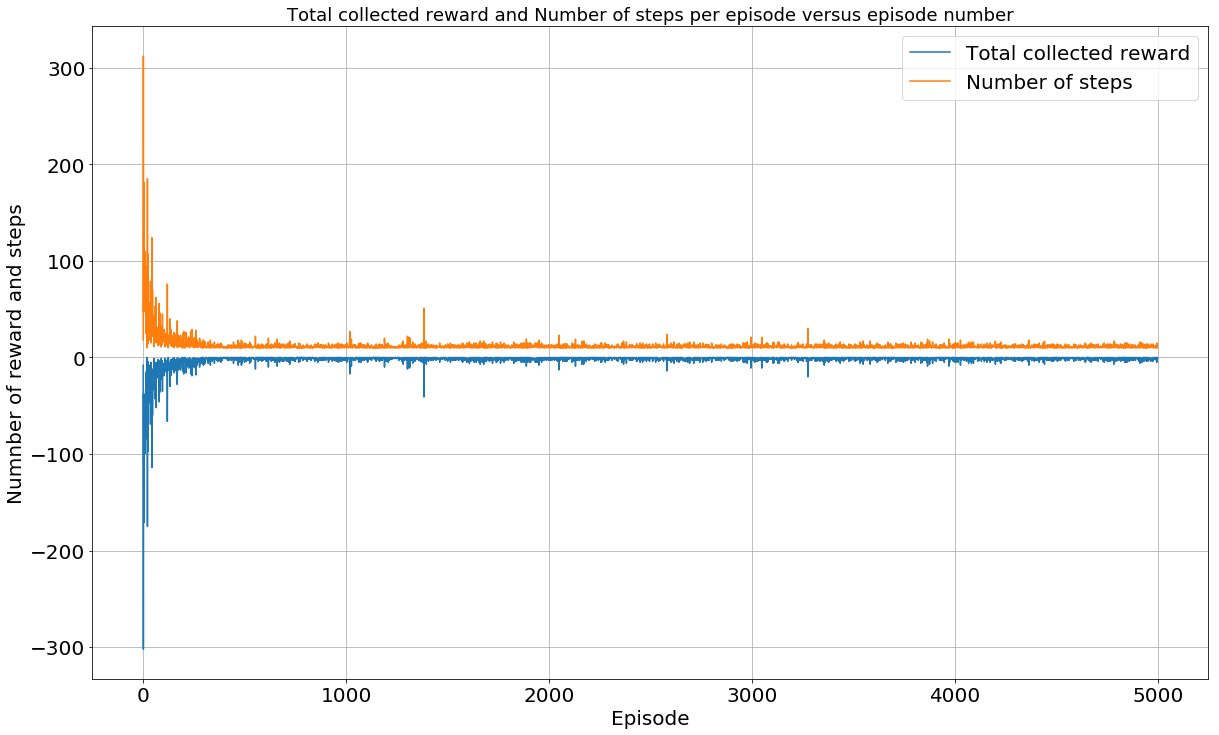

In [337]:
x_axis = np.arange(5000)

fig = plt.figure(figsize=(20, 12))
plt.title('Total collected reward and Number of steps per episode versus episode number', fontsize=18)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Numnber of reward and steps', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.plot(x_axis, reward_data, label = "Total collected reward")
plt.plot(x_axis, steps_data, label = "Number of steps")
plt.legend(fontsize=20)
plt.show()

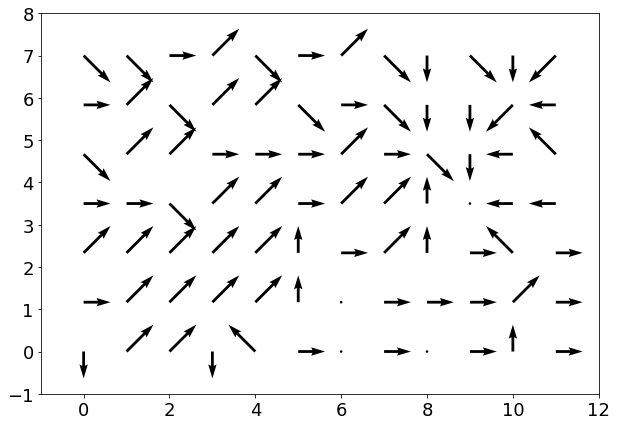

In [306]:
"""grid plot"""
x, y = np.meshgrid(np.linspace(0,11,12), np.linspace(0,7,7))
u=np.zeros((7,12))
v=np.zeros((7,12))
for i in range(7):
    for j in range(12):
        list_cur = action_rewards[i][j]
        zero_num = np.count_nonzero(list_cur == 0)
        if(zero_num==8):
            u[i][j] = 0
            v[i][j] = 0
        else:
            u[i][j] = moves[np.argmax(list_cur)][1]
            v[i][j] = moves[np.argmax(list_cur)][0]
            
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-1, 12)
ax.set_ylim(-1, 8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.quiver(x, y, u, v, width=0.005)
plt.show()

#### one run from start to goal with the Greedy action selection (no exploration) on the learned policy showing the action selected in each cell (use here a different colour)


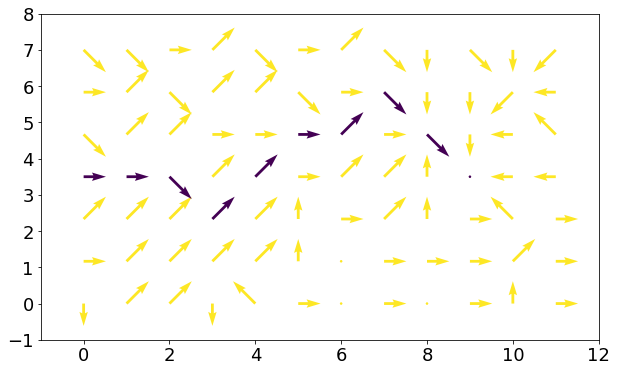

In [307]:
c = [[1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1]]

G=np.array([3,9])
path = np.array([[3,0]])
while (path[-1]!=G).any():
    now_x = path[-1][0]
    now_y = path[-1][1]
    move = np.array([ v[now_x][now_y], u[now_x][now_y]], dtype=int)
    moveto = path[-1] + move
    path = np.append(path, [moveto], axis = 0)
    
# print(path)

for i in range(len(path)):
    c[path[i][0]][path[i][1]] = 0
    
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-1, 12)
ax.set_ylim(-1, 8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.quiver(x, y, u, v, c, width=0.005, scale=25)
plt.show()

1. Total collected reward per episode versus the episode number

2. Number of steps to reach the goal per episode versus the episode number

### How will the learning process change if we make ε = 0, while keeping the other parameters the same?

In [312]:
action_rewards = np.zeros((7,12,8))
wind = [0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0]
moves =np.array(  [ [0, 1], [1,1], [1,0], [1,-1], [0,-1], [-1, -1], [-1,0], [-1, 1] ] )
epsilon = 0
alpha = 0.1
gama = 0.9
G=np.array([3, 9])

reward_data = [] # store reward of each episode
steps_data = [] # store steps of each episode

Times=0
while Times<5000:
    S=np.array([3, 0])
    action_rewards, reward, steps = eachEpisode(S, G, action_rewards, wind, moves, epsilon, alpha, gama)
    reward_data.append(reward)
    steps_data.append(steps)
    Times += 1

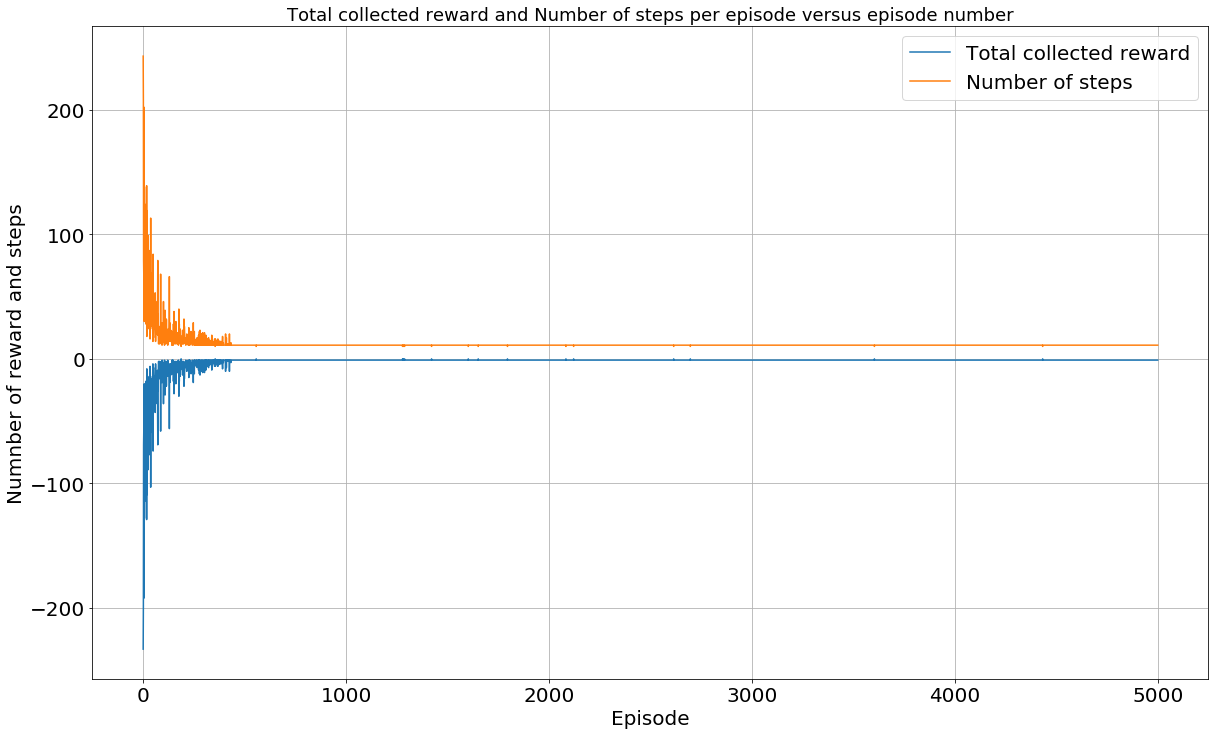

In [313]:
x_axis = np.arange(5000)

fig = plt.figure(figsize=(20, 12))
plt.title('Total collected reward and Number of steps per episode versus episode number', fontsize=18)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Numnber of reward and steps', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.plot(x_axis, reward_data, label = "Total collected reward")
plt.plot(x_axis, steps_data, label = "Number of steps")
plt.legend(fontsize=20)
plt.show()

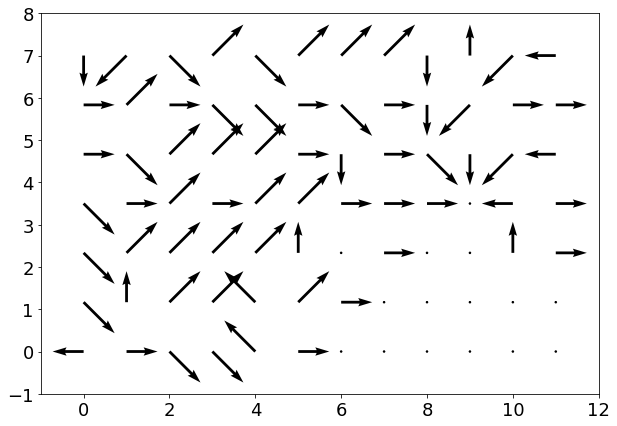

In [314]:
"""ε = 0 grid plot"""
x, y = np.meshgrid(np.linspace(0,11,12), np.linspace(0,7,7))
u=np.zeros((7,12))
v=np.zeros((7,12))
for i in range(7):
    for j in range(12):
        list_cur = action_rewards[i][j]
        zero_num = np.count_nonzero(list_cur == 0)
        if(zero_num==8):
            u[i][j] = 0
            v[i][j] = 0
        else:
            u[i][j] = moves[np.argmax(list_cur)][1]
            v[i][j] = moves[np.argmax(list_cur)][0]
            
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-1, 12)
ax.set_ylim(-1, 8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.quiver(x, y, u, v, width=0.005)
plt.show()

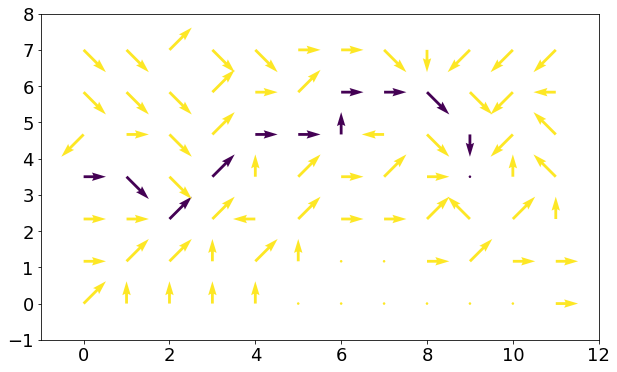

In [338]:
c = [[1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1]]

G=np.array([3,9])
path = np.array([[3,0]])
while (path[-1]!=G).any():
    now_x = path[-1][0]
    now_y = path[-1][1]
    move = np.array([ v[now_x][now_y], u[now_x][now_y]], dtype=int)
    moveto = path[-1] + move
    path = np.append(path, [moveto], axis = 0)
    
# print(path)

for i in range(len(path)):
    c[path[i][0]][path[i][1]] = 0
    
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-1, 12)
ax.set_ylim(-1, 8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.quiver(x, y, u, v, c, width=0.005, scale=25)
plt.show()

# ------------------------------------------------------------------------------

### How will the learning process change if we make γ = 1, while keeping the other parameters the same?

In [381]:
action_rewards = np.zeros((7,12,8))
wind = [0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0]
moves =np.array(  [ [0, 1], [1,1], [1,0], [1,-1], [0,-1], [-1, -1], [-1,0], [-1, 1] ] )
epsilon = 0.2
alpha = 0.2
gama = 1
G=np.array([3, 9])

reward_data = [] # store reward of each episode
steps_data = [] # store steps of each episode

Times=0
while Times<5000:
    S=np.array([3, 0])
    action_rewards, reward, steps = eachEpisode(S, G, action_rewards, wind, moves, epsilon, alpha, gama)
    reward_data.append(reward)
    steps_data.append(steps)
    Times += 1

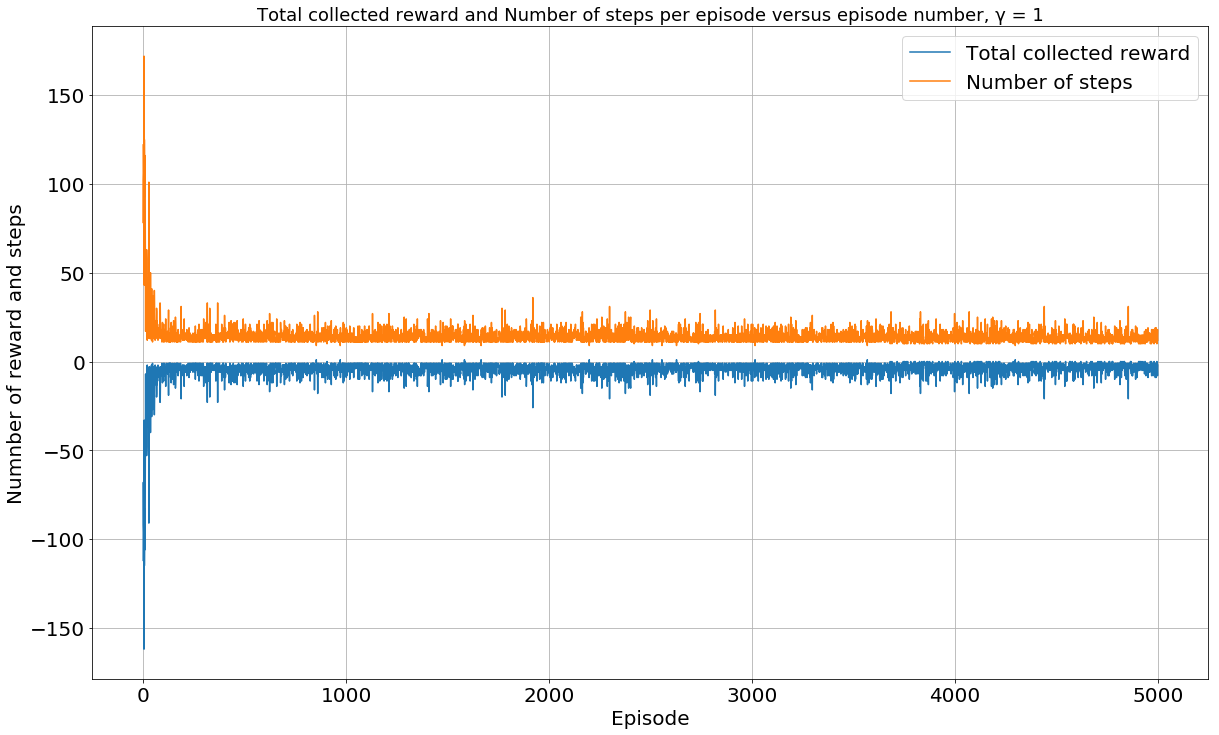

In [382]:
x_axis = np.arange(5000)

fig = plt.figure(figsize=(20, 12))
plt.title('Total collected reward and Number of steps per episode versus episode number, γ = 1', fontsize=18)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Numnber of reward and steps', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.plot(x_axis, reward_data, label = "Total collected reward")
plt.plot(x_axis, steps_data, label = "Number of steps")
plt.legend(fontsize=20)
plt.show()

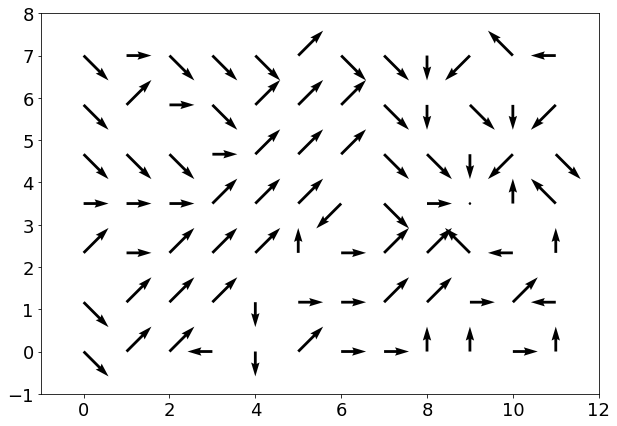

In [350]:
"""γ = 1,  grid plot"""
x, y = np.meshgrid(np.linspace(0,11,12), np.linspace(0,7,7))
u=np.zeros((7,12))
v=np.zeros((7,12))
for i in range(7):
    for j in range(12):
        list_cur = action_rewards[i][j]
        zero_num = np.count_nonzero(list_cur == 0)
        if(zero_num==8):
            u[i][j] = 0
            v[i][j] = 0
        else:
            u[i][j] = moves[np.argmax(list_cur)][1]
            v[i][j] = moves[np.argmax(list_cur)][0]
            
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-1, 12)
ax.set_ylim(-1, 8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.quiver(x, y, u, v, width=0.005)
plt.show()

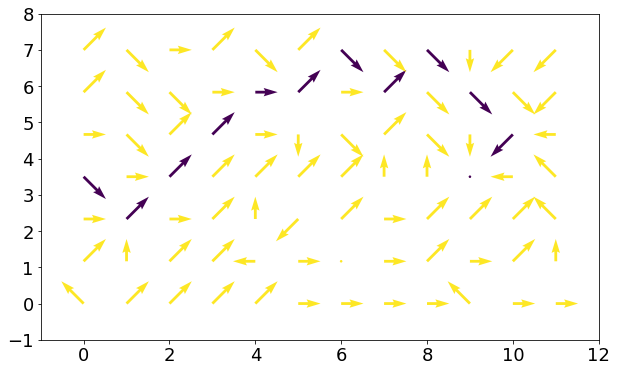

In [342]:
c = [[1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1,1,1,1,1]]

G=np.array([3,9])
path = np.array([[3,0]])
while (path[-1]!=G).any():
    now_x = path[-1][0]
    now_y = path[-1][1]
    move = np.array([ v[now_x][now_y], u[now_x][now_y]], dtype=int)
    moveto = path[-1] + move
    path = np.append(path, [moveto], axis = 0)
    
# print(path)

for i in range(len(path)):
    c[path[i][0]][path[i][1]] = 0
    
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-1, 12)
ax.set_ylim(-1, 8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.quiver(x, y, u, v, c, width=0.005, scale=25)
plt.show()